In [1]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import qiskit
from qiskit import QuantumCircuit
import matplotlib as plt
import math
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import torch
import random
import json
from math import log
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.extensions import UnitaryGate
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import log_loss
from numpy import asarray
from scipy.interpolate import interp1d

In [2]:
def createInputLayer(npArrayInput):
    data = EncodeUnitaryMatrix(npArrayInput)
    conv_data_matrix,conv_data_statevector = (data.get_unitary_gate(),data.get_quantum_data)
    circ, q = quantum_encode(conv_data_matrix)
    simulator = qiskit.Aer.get_backend('statevector_simulator')
    result = qiskit.execute(circ, simulator).result()
    statevector = result.get_statevector(circ)
    return circ

In [3]:
class EncodeUnitaryMatrix():
    def __init__(self,data):
        self.data = data

    # Check if a matrix is unitary using this function
    def is_unitary(self,m):
        return np.allclose(np.eye(len(m)), m.dot(m.T.conj()))

    def to_unitary_matrix(self):
        qm = self.toQuantumMatrix(self.data)
        qv =self.toQuantumData(self.data)
        self.data_matrix = np.array(qm)
        self.data_vector = np.array(qv)

    def toQuantumData(self,data):
        input_vec = data.copy().ravel()
        vec_len = input_vec.shape[0]
        input_matrix = np.zeros((vec_len, vec_len))
        input_matrix[0] = input_vec
        input_matrix = np.float64(input_matrix.transpose(0, 1))
        u, s, v = np.linalg.svd(input_matrix)
        output_matrix = np.dot(u, v)
        output_matrix = output_matrix
        output_data = output_matrix[0, :]
#         print(output_data)
        return output_data

    def toQuantumMatrix(self,data):
        input_vec = data.flatten()
        vec_len = input_vec.shape[0]
        input_matrix = np.zeros((vec_len,vec_len))
        input_matrix[0] = input_vec
        input_matrix = input_matrix.T
        u, s, v = np.linalg.svd(input_matrix)
        output_matrix = np.dot(u, v)
        return output_matrix

    def get_data(self):
        return self.data

    def get_unitary_gate(self):
        self.to_unitary_matrix()
        return self.data_matrix

    def get_quantum_data(self):
        self.to_unitary_matrix()
        return self.data_vector



In [4]:
backend = qiskit.Aer.get_backend('qasm_simulator')
plt.style.use('classic')


#function to create a parameter dictoanry of each gates current value.
#input the shape of your quantum circuit by giving an array where each value represents the number of gates in that layer of the circuit.
#Example... 4 layers where each layer has 3 quantum gates would be qbitsPerLayerArray = [3,3,3,3] = [layer1,layer2,layer3,layer3]
def createParameterDictonary(qbitsPerLayerArray):
    amountOfLayers = len(qbitsPerLayerArray)
    networkValues = {}
    for layer in range(0,amountOfLayers):
        networkValues["Qbit" + str(layer)] = {}
        currentQbitAmount = qbitsPerLayerArray[layer]
        for qbit in range(0,currentQbitAmount):
            networkValues["Qbit" + str(layer)]["Gate" + str(qbit)] = [random.uniform(0, math.pi)]
    
 
    networkValues["Qubit Measurement"] = []
    return networkValues


#print out what the current paremter dictonary looks like neatly
def showNetwork(networkValues):
    print(json.dumps(networkValues, indent=4, sort_keys=True))

def crossedUp(p,q):
    y_true = asarray([[1-v, v] for v in p])
    y_pred = asarray([[1-v, v] for v in q])
    ll = log_loss(y_true, y_pred)
    return ll
    
    
#binary cross entropy loss function
# def crossedUp(p,q):
#     total = 0.0
#     for i in range(len(p)):
#         currentLoss = (p[i])*(-log(q[i])) + (1-p[i])*(-log(1-q[i]))
#         total += currentLoss
#     totalScore = (1.0 / len(p)) * total
#     return totalScore

#function that creates a circuit depending on the given input circuit fed to it and depending on the values in the current parameter Dictionary(networkValues).
def initializeCircuit_ry_ryy_ry(inputCirc,networkValues):
    circuit = inputCirc
    
    circuit.ry(networkValues["Qbit0"]["Gate0"][0],0)
    circuit.ry(networkValues["Qbit1"]["Gate0"][0],1)
    circuit.ry(networkValues["Qbit2"]["Gate0"][0],2)
    circuit.ry(networkValues["Qbit3"]["Gate0"][0],3)
    circuit.ry(networkValues["Qbit4"]["Gate0"][0],4)
    circuit.ry(networkValues["Qbit5"]["Gate0"][0],5)
    circuit.ry(networkValues["Qbit6"]["Gate0"][0],6)


    
    
    
    
    
    
    
    circuit.cry(networkValues["Qbit0"]["Gate1"][0],0,1)
    circuit.cry(networkValues["Qbit1"]["Gate1"][0],1,2)
    circuit.cry(networkValues["Qbit2"]["Gate1"][0],2,3)
    circuit.cry(networkValues["Qbit3"]["Gate1"][0],3,4)
    circuit.cry(networkValues["Qbit4"]["Gate1"][0],4,5)
    circuit.cry(networkValues["Qbit5"]["Gate1"][0],5,6)
    circuit.cry(networkValues["Qbit6"]["Gate1"][0],6,0)

   

    
    
    
    
    
    circuit.ry(networkValues["Qbit0"]["Gate2"][0],0)
    circuit.ry(networkValues["Qbit1"]["Gate2"][0],1)
    circuit.ry(networkValues["Qbit2"]["Gate2"][0],2)
    circuit.ry(networkValues["Qbit3"]["Gate2"][0],3)
    circuit.ry(networkValues["Qbit4"]["Gate2"][0],4)
    circuit.ry(networkValues["Qbit5"]["Gate2"][0],5)
    circuit.ry(networkValues["Qbit6"]["Gate2"][0],6)

  
    
    
    
    
    
    
    circuit.cry(networkValues["Qbit0"]["Gate1"][0],5,6)
    circuit.cry(networkValues["Qbit1"]["Gate1"][0],4,6)
    circuit.cry(networkValues["Qbit2"]["Gate1"][0],3,6)
    circuit.cry(networkValues["Qbit3"]["Gate1"][0],2,6)
    circuit.cry(networkValues["Qbit4"]["Gate1"][0],1,6)
    circuit.cry(networkValues["Qbit5"]["Gate1"][0],0,6)


    
    
    
    
    circuit.measure(6,0)
    return circuit

#function to encode the qbits into an input
def quantum_encode(quantum_matrix):
    dims = len(quantum_matrix) 
    q=int(np.log2(dims)) 
    c=1
    inp = QuantumRegister(q+1,"in_qbit")
    circ = QuantumCircuit(inp)
    c_reg = ClassicalRegister(c,"reg")
    circ.add_register(c_reg)
    circ.append(UnitaryGate(quantum_matrix, label="Input"), inp[0:q])
    return circ, q

#get the current quantum circuit theta perameters
def getCurrentParams(networkDictionary):
    currentParams = []
    for key in networkDictionary.keys():
        if key != "Qubit Measurement":
            for gateValue in networkDictionary[key].keys():
                currentParams.append(networkDictionary[key][gateValue][-1])
    return currentParams

#use this function to change the parametrs of the circuit 
def updateCurrentParams(newValues,networkDictionary):
    i = 0
    for key in networkDictionary.keys():
        if key != "Qubit Measurement":
            for gateValue in networkDictionary[key].keys():
                networkDictionary[key][gateValue][0] = newValues[i]
                i += 1

#function to compute the gradient depending on our two costs and our learning rate given
def getGradient(array,learningRate):
    cost1 = array[0]
    cost2 = array[1]
    return ((cost1 - cost2))/2
    
#accuracy score 
#TP = True Posotive
#TN = True Negative
#FP = False Posotive
#FN = False Negative
def accuracyScore(actualValues,experimentalValues):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(0,len(actualValues)):
        if actualValues[i] == 1 and experimentalValues[i] == 1:
            TP += 1
        elif actualValues[i] == 0 and experimentalValues[i] == 1:
            FP += 1
        elif actualValues[i] == 1 and experimentalValues[i] == 0:
            FN += 1
        elif actualValues[i] == 0 and experimentalValues[i] == 0:
            TN += 1
    top = TP + TN
    bottom = TP + TN + FP + FN
    return ((top/bottom) * 100)
                

In [5]:
def trainCircuit2(x_train,y_train,validationTrain,validationTest):
    totalCost =  []
    lossArray1 = []
    epochNumber = []
    trainingAccuracy = []
    validationAccuracy = []
    validationLoss = []
    #set learning Rate
    learningRate = 1
    #creates dictonary of paramater values at random from 0-2pi 
    networkValues = createParameterDictonary([4,4,4,4,4,4,3])
    #training Data
    trainingData = x_train
    #testing Data... 0 to signify a False or a 6 and 1 to signify a True or a 3
    testingData = y_train
    #loop 188 times and test each batch on 64 data points each
    validationTrainingData = validationTrain[0:1968]
    validationTestingData = validationTest[0:1968]
    trainingDataFull = x_train.copy()
    testingDataFull = y_train.copy()
    for b in range(64):
        print("Starting Epoch " + str(b + 1))
        #get an array of the current paramaters from our dictonary
        currentParams = getCurrentParams(networkValues)
        #testing data array from 0-64 so we can keep measuring the first 64 points.  We will later delete the first 64 so we dont use the same ones multiple times
        realValues = testingData[0:188]
        #loop through each of the 12 parameters in our current parameter array so we can calculate the cost of +.5pi and -.5pi and than use that to get the gradient and make updates.
        for i in range(0,len(currentParams)):
            currPrediction = []
            #save the original parameters so we can update them
            og = currentParams
            plusPi = currentParams.copy()
            minusPi = currentParams.copy()
            plusPi[i] += (.5*math.pi)
            minusPi[i] -= (.5*math.pi)
            #[1.5,1,1,1,1,1,1,1,1,1,1,1]
            #[.5,1,1,1,1,1,1,1,1,1,1,1]
            
            #array to store each array above.
            both = [plusPi,minusPi]
            #array to store both of the costs of the above array
            twoCosts = []
            #loop through the both arrary and for each array we will run the circuit 64 times for a -.5pi change and a +.5pi change and record the costs after we complete 64 points of data
            for x in range(2):
                currArray = both[x]
                #update values to the +.5pi array and than the +.5pi array after
                updateCurrentParams(currArray,networkValues)
                predictionAcc = []
                currPrediction = []
                #run the circuit 64 times and record what the results['1'] is each time and convert it to a probability by dividing results['1'] by the shot count amount.  currently set to 500
                for t in range(188):
                    inputCirc = createInputLayer(np.asarray(trainingData[t]))
                    mlp = initializeCircuit_ry_ryy_ry(inputCirc,networkValues)
                    job = qiskit.execute(mlp,backend,shots = 8000)
                    results = job.result().get_counts(mlp)
                    if '1' not in results:
                        currPrediction.append(0)
                    else:   
                        currPrediction.append(results['1']/8000)
                costToAppend = crossedUp(realValues,currPrediction)
                twoCosts.append(costToAppend)
            #get the gradient of the two costs
            gradient = getGradient(twoCosts,learningRate)
            #if gradient is above 0 than subtract gradient from our value and if it is below we will add it to our value
            og[i] -= gradient
            updateCurrentParams(og,networkValues)
        #use these two arrays below so we can test our current accuracy and loss on the fully updated parameter array and check if the network is learning or not.
        
        checkAcc = []
        checkLoss = []
        checkValLoss = []
        checkValAcc = []
        for p in range(12032):
            inputCirc = createInputLayer(np.asarray(trainingDataFull[p]))
            mlp = initializeCircuit_ry_ryy_ry(inputCirc,networkValues)
            job = qiskit.execute(mlp,backend,shots = 8000)
            results = job.result().get_counts(mlp)
            if '1' not in results and '0' in results:
                checkAcc.append(0)
            elif '0' not in results and '1' in results:
                checkAcc.append(1)
            elif results['1'] >= results['0']:
                checkAcc.append(1)
            else:
                checkAcc.append(0)
            if '1' in results:
                checkLoss.append(results['1']/8000)
            else:
                checkLoss.append(0)
        #printing current parameters
        lossArray1.append(crossedUp(testingDataFull,checkLoss))
        trainingAccuracy.append((accuracyScore(testingDataFull,checkAcc)))
        epochNumber.append(b+1)
        
        
        
        for p in range(1968):
            inputCirc = createInputLayer(np.asarray(validationTrainingData[p]))
            mlp = initializeCircuit_ry_ryy_ry(inputCirc,networkValues)
            job = qiskit.execute(mlp,backend,shots = 8000)
            results = job.result().get_counts(mlp)
            if '1' not in results and '0' in results:
                checkValAcc.append(0)
            elif '0' not in results and '1' in results:
                checkValAcc.append(1)
            elif results['1'] >= results['0']:
                checkValAcc.append(1)
            else:
                checkValAcc.append(0)
            if '1' in results:
                checkValLoss.append(results['1']/8000)
            else:
                checkValLoss.append(0)
        #printing current parameters
        validationLoss.append(crossedUp(validationTestingData,checkValLoss))
        validationAccuracy.append(accuracyScore(validationTestingData,checkValAcc))
        
        
    
        print("___________________________________________________________________________________")
        print("                     ")
        print("Training Accuracy " + str(b+1) + " " + str(trainingAccuracy[-1]) + "%")
        print("                     ")
        print("Training Loss:------> " + str(lossArray1[-1]))
        print("                     ")
        print("___________________________________________________________________________________")
        print("                     ")
        
        
        
        
        print("___________________________________________________________________________________")
        print("                     ")
        print("Validation Accuracy " + str(b+1) + " " + str(validationAccuracy[-1]) + "%")
        print("                     ")
        print("Validation Loss:------> " + str(validationLoss[-1]))
        print("                     ")
        print("___________________________________________________________________________________")
        print("                     ")
    
    
    
    
        plt.plot(epochNumber,lossArray1,label = "Training Loss")
        plt.plot(epochNumber,validationLoss,label = "Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Cross Entropy Loss")
        plt.legend()
        plt.show()
        
        plt.plot(epochNumber,trainingAccuracy,label = "Training Accuracy")
        plt.plot(epochNumber,validationAccuracy,label = "Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Model Accuracy")
        plt.legend()
        plt.show()

        #remove the first 64 values from the data so we do not use them again and so we can keep using [0:64] to get our correct points of data
        for pop in range(188):
            trainingData.pop(0)
            testingData.pop(0)
    #get current parametrs and return them
    retValue = getCurrentParams(networkValues)
    return [retValue,validationLoss,validationAccuracy,lossArray1,trainingAccuracy]

In [6]:
#Function to filter out only the 3s and the 6s from the MNIST data   
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y
#load in data and split it into training and testing data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#normalize values from 255.0 to 0-1 range
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)
print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))
#True = 3 
#False = 6

Number of original training examples: 60000
Number of original test examples: 10000
Number of filtered training examples: 12049
Number of filtered test examples: 1968


True


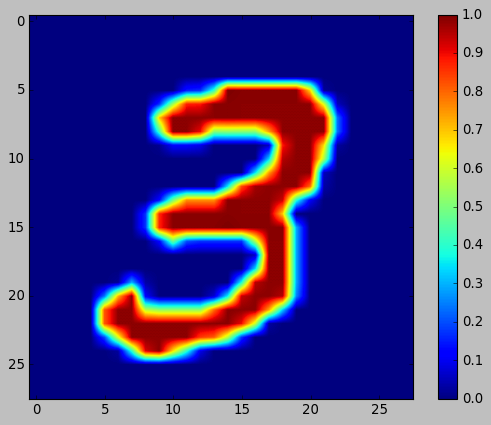

In [7]:
# 28 x 28 image before downscaling to 4x4
print(y_train[0])
plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

In [8]:
#this block of code downscales our data and we can print the new looking data after to see if it worked (next block will print it)

x_train_small = tf.image.resize(x_train, (8,8)).numpy()
x_test_small = tf.image.resize(x_test, (8,8)).numpy()

#Reformat the data into a 1-d Array with 16 values so we can change it into a quantum input of 4 dimensions
#x_train_new = x_train values in an array
x_train_new = []
for i in range(len(x_train_small)):
    temp = []
    for j in range(0,8):
        for x in range(0,8):
            temp.append(x_train_small[i, :, :, 0][j][x])
    x_train_new.append(temp)
    
x_test_new = []
for i in range(len(x_test_small)):
    temp = []
    for j in range(0,8):
        for x in range(0,8):
            temp.append(x_test_small[i, :, :, 0][j][x])
    x_test_new.append(temp)
#y_train_values is an array of the correct predictions to each matrix

y_train_new = []
for val in y_train:
    y_train_new.append(val)
    
y_test_new = []
for val in y_test:
    y_test_new.append(val)
    
for x in range(0,len(y_train)):
    if y_train_new[x] == False:
        y_train_new[x] = 0
    else:
        y_train_new[x] =  1
        
for x in range(0,len(y_test)):
    if y_test_new[x] == False:
        y_test_new[x] = 0
    else:
        y_test_new[x] =  1
        
y_train_new = y_train_new[0:12032] 
x_train_new = x_train_new[0:12032] 
print(len(x_train_new))
print(len(y_train_new))

12032
12032


1968


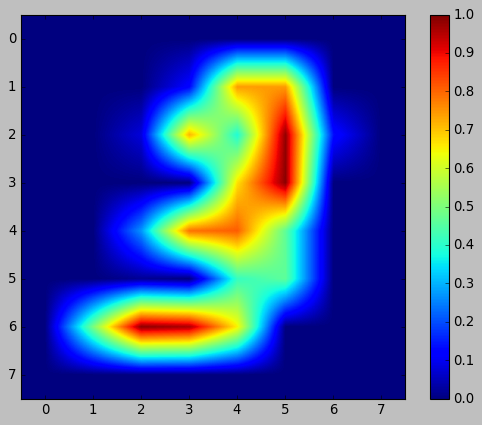

In [9]:
# Downscaled image of the data

plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()

validationTest = y_test_new
print(len(validationTest))

In [10]:
validationTrain = x_test_new
print(len(validationTrain[0]))

64


In [ ]:
#Running the actual circuit
runIt = trainCircuit2(x_train_new,y_train_new,validationTrain,validationTest)

Starting Epoch 1


In [ ]:
#THIS SECTION IS ONLY FOR SHOWING RESULTS OF ONE PREVIOUS RUN.


validationLoss = [0.7065197319622184, 0.6961682816177376, 0.6879421756181926, 0.6800783500300215, 0.6730046123620115, 0.6660404299292935, 0.6621328603367825, 0.6593133260486591, 0.6561686136501226, 0.6527624609935354, 0.6476349023640933, 0.6422662539112788, 0.6370653060833782, 0.6315790411083447, 0.6261766397151969, 0.6161656287444685, 0.6044998547331123, 0.5919310442025195, 0.5798352512289834, 0.5657056649077582, 0.5533792638951747, 0.5420062328403242, 0.5348361519168738, 0.527350532673123, 0.5265809153782466, 0.5248024439820217, 0.5208703898611025, 0.5181268971316528, 0.5174473889817891, 0.515085034723602, 0.5158520634627126, 0.5154965030966336, 0.5161897377722052, 0.5122262551487176, 0.5102633427125663, 0.509288729252355, 0.5067702046160154, 0.5059248213183996, 0.505309756464956, 0.50495489244524, 0.5041432861481432, 0.5072771605653078, 0.5095357767932133, 0.5077473746868931, 0.512398032022094, 0.5120111337306834, 0.5105014918904806, 0.5075051383774598, 0.5052111997693851, 0.5016074045619242, 0.5001572969933568, 0.49989925236572275, 0.4977816449756449, 0.4953036612953202, 0.4934623526314275, 0.49242505651327123, 0.4918992219296791, 0.48938045669922536, 0.48759859881849793, 0.4859628328052825, 0.4850482583052382, 0.48295119279683196, 0.4815366881388996, 0.47992244839765447]
validationAccuracy = [50.45731707317073, 53.09959349593496, 55.74186991869918, 57.57113821138211, 59.80691056910569, 61.4329268292683, 63.46544715447154, 64.17682926829268, 65.14227642276423, 66.10772357723577, 68.03861788617887, 70.47764227642277, 72.66260162601627, 74.89837398373984, 74.79674796747967, 76.3211382113821, 77.59146341463415, 79.9288617886179, 80.9959349593496, 82.16463414634147, 82.5711382113821, 81.45325203252033, 81.09756097560977, 81.35162601626016, 81.14837398373984, 80.6910569105691, 81.25, 81.25, 81.25, 81.5040650406504, 80.9959349593496, 80.9959349593496, 80.74186991869918, 81.35162601626016, 82.3678861788618, 82.3170731707317, 83.63821138211382, 84.7560975609756, 84.95934959349594, 84.7560975609756, 85.26422764227642, 85.0609756097561, 85.16260162601627, 86.58536585365853, 85.77235772357723, 86.9410569105691, 88.71951219512195, 89.43089430894308, 91.0060975609756, 92.22560975609755, 92.9369918699187, 92.83536585365853, 93.34349593495935, 93.34349593495935, 93.29268292682927, 93.59756097560977, 93.64837398373984, 93.80081300813008, 93.4959349593496, 93.75, 93.85162601626016, 93.85162601626016, 93.85162601626016, 94.20731707317073]
lossArray1 = [0.7022421315489921, 0.691968058819493, 0.6844128233959524, 0.677189230711089, 0.670653397668069, 0.664386755657983, 0.6604882225390517, 0.6573026685587642, 0.6549835058529195, 0.6512237734803251, 0.6465633765162409, 0.6413345194156598, 0.6360680577758607, 0.6308686679405721, 0.6251352966564665, 0.6158360763711556, 0.6045240367192182, 0.5924136244729947, 0.5808970933197711, 0.5663024383746147, 0.5542876005360792, 0.5438234524084682, 0.5366872667665774, 0.5306114107651576, 0.5304138561518515, 0.5279346083395454, 0.5242296175578639, 0.5222639394652104, 0.5204164335926306, 0.5185452442916935, 0.5192568369500935, 0.5192153634865535, 0.5221425297848209, 0.5163548047244879, 0.5144339096193653, 0.5137508904282011, 0.5106598946604132, 0.5105849226254435, 0.5104800310034971, 0.5091822508083078, 0.5085079287107619, 0.5108817662601987, 0.5124159963943272, 0.5109765018617128, 0.5155379425808893, 0.5160378516285603, 0.5139789056892705, 0.5119288870825501, 0.5096751964721492, 0.5060909385902276, 0.5054337834114966, 0.5049405762627258, 0.5034617146230538, 0.5008820710276612, 0.4995231387540809, 0.498568216911323, 0.49765438279925556, 0.49544394933437697, 0.4935417842100531, 0.4923319784707809, 0.4910404299878526, 0.4892810917366617, 0.48820877910601496, 0.48682587421113804]
trainingAccuracy = [52.102726063829785, 55.06981382978723, 56.98969414893617, 58.178191489361694, 60.2061170212766, 62.14261968085106, 63.19813829787234, 64.97672872340425, 65.61668882978722, 66.86336436170212, 68.6751994680851, 70.24601063829788, 73.00531914893617, 74.79222074468085, 75.32413563829788, 76.4876994680851, 77.95877659574468, 79.86203457446808, 80.5684840425532, 81.15857712765957, 81.04222074468085, 79.79554521276596, 79.62932180851064, 79.91190159574468, 79.3716755319149, 79.03922872340425, 79.77892287234043, 79.80385638297872, 79.45478723404256, 79.75398936170212, 79.3716755319149, 79.47140957446808, 79.33011968085107, 79.7373670212766, 80.91755319148936, 81.5907579787234, 82.36369680851064, 83.75997340425532, 84.44148936170212, 83.41090425531915, 84.24202127659575, 83.70179521276596, 83.90126329787235, 85.1811835106383, 84.40824468085107, 85.61336436170212, 87.60804521276596, 88.21476063829788, 89.62765957446808, 90.80784574468085, 91.59740691489363, 91.37300531914893, 91.73038563829788, 92.5033244680851, 92.41190159574468, 92.5282579787234, 92.56981382978722, 92.9188829787234, 93.15990691489363, 93.25132978723404, 93.17652925531915, 93.25132978723404, 93.2845744680851, 93.52559840425532]
print("___________________________________________________________________________________")
print("                     ")
print("Training Accuracy " + str(trainingAccuracy[-1]) + "%")
print("                     ")
print("Training Loss:------> " + str(lossArray1[-1]))
print("                     ")
print("___________________________________________________________________________________")
print("                     ")




print("___________________________________________________________________________________")
print("                     ")
print("Testing Accuracy " + str(validationAccuracy[-1]) + "%")
print("                     ")
print("Testing Loss:------> " + str(validationLoss[-1]))
print("                     ")
print("___________________________________________________________________________________")
print("                     ")



plt.figure(figsize=(7, 5))
plt.plot([i for i in range (len(lossArray1))],lossArray1,label = "Training Loss",color='blue',   
         linewidth=1.2,  )
plt.plot([i for i in range (len(lossArray1))],validationLoss,label = "Testing Loss",color='orange',   
         linewidth=1.2,)
plt.xlabel("Batch")
plt.ylabel("Cross Entropy Loss")
plt.legend(loc='upper left')
plt.grid()
plt.show()

plt.figure(figsize=(7, 5))
plt.plot([i for i in range (len(lossArray1))],trainingAccuracy,label = "Training Accuracy",color='blue',   
         linewidth=1.2,   )
plt.plot([i for i in range (len(lossArray1))],validationAccuracy,label = "Testing Accuracy",color='orange',   
         linewidth=1.2,)
plt.xlabel("Batch")
plt.ylabel("Model Accuracy")
plt.legend(loc='upper left')
plt.grid()
plt.show()
